In [1]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные моделиё
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #сплитование выборки

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score
import hyperopt
from hyperopt import hp, fmin, tpe, Trials

import optuna


%matplotlib inline
plt.style.use('seaborn')

C:\Users\User\AppData\Local\Temp\ipykernel_6816\808540093.py:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [12]:
random_state = 42

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('data/_train_sem09 (1).csv')
df.head()

Activity        D1        D2    D3   D4        D5        D6        D7  \
0         1  0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166   
1         1  0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105   
2         1  0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453   
3         1  0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606   
4         0  0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361   

         D8        D9       D10       D11     D12       D13       D14  \
0  0.585445  0.743663  0.243144  0.187856  0.0000  0.000000  0.069000   
1  0.411754  0.836582  0.106480  0.101382  0.1875  0.193548  0.131001   
2  0.517720  0.679051  0.352308  0.193548  0.1250  0.000000  0.068900   
3  0.288764  0.805110  0.208989  0.000000  0.0000  0.000000  0.145947   
4  0.303809  0.812646  0.125177  0.532258  0.0000  0.000000  0.094900   

        D15       D16       D17       D18       D19       D20      D21  \
0  0.362012  0.301773  0.597930  0.190813  0.107219  0.070500  0.00717   
1  0.350206  0.187419  0.762669  0.180473  0.329962  0.107681  0.01950   
2  0.574628  0.283327  0.510633  0.184480  0.073300  0.061600  0.00566   
3  0.584688  0.325247  0.496745  0.242288  0.087700  0.075300  0.01680   
4  0.540323  0.116775  0.552982  0.167897  0.116140  0.054200  0.01350   

        D22  D23   D24       D25       D26  D27  D28       D29       D30  \
0  0.137931    1  0.00  0.496683  0.753131    1    1  0.000000  0.262919   
1  0.206897    0  0.75  0.449869  0.720484    0    0  0.666667  0.099400   
2  0.000000    1  0.00  0.486610  0.803577    0    1  0.000000  0.428659   
3  0.000000    1  0.00  0.459122  0.829482    0    1  0.000000  0.435410   
4  0.103448    1  0.00  0.381883  0.913374    0    1  0.000000  0.305333   

        D31       D32       D33      D34       D35  D36  D37       D38  \
0  0.077200  0.082700  0.200590  0.00000  0.000000  0.0  0.0  0.162383   
1  0.289240  0.216710  0.100295  0.16958  0.235294  0.0  0.0  0.119104   
2  0.032400  0.072400  0.000000  0.03930  0.000000  0.0  0.0  0.076100   
3  0.118562  0.000000  0.000000  0.00000  0.000000  0.0  0.0  0.068900   
4  0.054100  0.170822  0.000000  0.00000  0.176471  0.0  0.0  0.019900   

        D39       D40  D41  D42       D43       D44       D45       D46  \
0  0.150153  0.000000  0.0  0.0  0.000000  0.092000  0.057300  0.426576   
1  0.075100  0.000000  0.0  0.0  0.199919  0.312883  0.276016  0.647681   
2  0.225229  0.000000  0.0  0.0  0.066600  0.000000  0.079100  0.298171   
3  0.000000  0.148444  0.0  0.0  0.000000  0.000000  0.000000  0.402020   
4  0.057400  0.000000  0.0  0.0  0.000000  0.161189  0.312830  0.707479   

        D47       D48       D49       D50  D51       D52       D53     D54  \
0  0.234822  0.050200  0.000000  0.833333    0  1.000000  0.121520  0.0000   
1  0.286386  0.324514  0.156568  1.000000    0  0.578947  0.268620  0.0634   
2  0.212155  0.051200  0.000000  0.750000    1  1.000000  0.000000  0.0211   
3  0.122696  0.000000  0.000000  0.000000    0  1.000000  0.000000  0.0000   
4  0.089500  0.088000  0.117426  1.000000    0  1.000000  0.140657  0.0000   

        D55       D56       D57       D58  D59     D60       D61      D62  \
0  0.000000  0.000000  0.035100  0.133438  0.0  0.0000  0.011700  0.00000   
1  0.190839  0.000000  0.368455  0.191837  0.0  0.0689  0.175271  0.28171   
2  0.063900  0.000000  0.017600  0.000000  0.0  0.0275  0.070900  0.07180   
3  0.000000  0.149531  0.000000  0.000000  0.0  0.0294  0.137096  0.00000   
4  0.000000  0.187500  0.000000  0.000000  0.0  0.0294  0.070900  0.00000   

        D63  D64       D65       D66       D67       D68       D69       D70  \
0  0.000000  0.0  0.034600  0.027100  0.361513  0.000000  0.075300  0.611301   
1  0.254301  0.0  0.362117  0.161739  0.161839  0.051000  0.268761  0.806448   
2  0.000000  0.0  0.017300  0.000000  0.156408  0.069700  0.024700  0.517376   
3  0.000000  0.0  0.000000  0.000000  0.027900  0.149531 

### Проверяем сбалансированность выборки

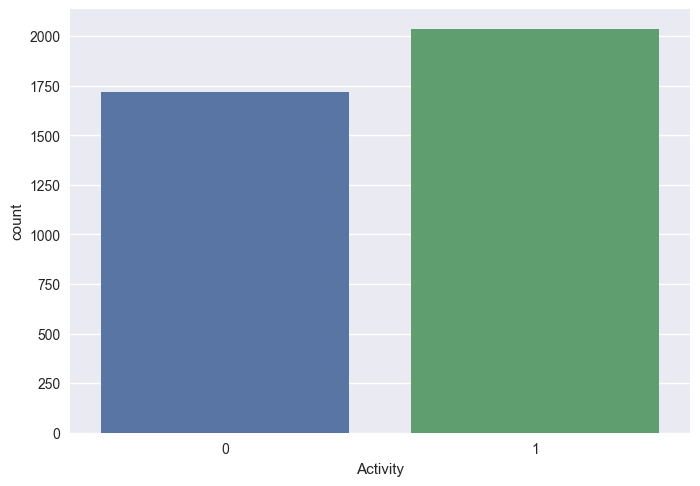

In [4]:
sns.countplot(data=df, x='Activity');

### Будем делить выборку со стратификацией


In [5]:
X = df.drop(['Activity'], axis=1)
y = df['Activity']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.2)

### Обучаем модели с параметрами по умолчанию, фиксируем целевые метрики

##### Логистическая регрессия

In [7]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(max_iter=50)

#Обучаем модель
log_reg.fit(X_train, y_train)
y_train_pred=log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)
#Выводим значения метрики
print('f1_score на тренировочном наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

e:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1_score на тренировочном наборе: 0.88
f1_score на тестовом наборе: 0.78


#### Обучаем случайный лес

In [8]:
#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier(random_state=42)

#Обучаем модель
rf.fit(X_train, y_train)
#Выводим значения метрики 
y_train_pred = rf.predict(X_train)
print('f1_score на тренировочном наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = rf.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тренировочном наборе: 1.00
f1_score на тестовом наборе: 0.80


### <center> **GridSearchCV**

In [9]:
param_grid = [
              {'penalty': ['l2', 'none'] , # тип регуляризации
              'solver': ['lbfgs', 'sag'], # алгоритм оптимизации
               'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}, # уровень силы регурялизации
              
              {'penalty': ['l1', 'l2'] ,
              'solver': ['liblinear', 'saga'],
               'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}
]
grid_search_1 = GridSearchCV(
    estimator=linear_model.LogisticRegression(random_state=42, max_iter=50), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search_1.fit(X_train, y_train) 

y_test_pred = grid_search_1.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_1.best_params_))

CPU times: total: 9.86 s
Wall time: 11min 17s
f1_score на тестовом наборе: 0.79
Наилучшие значения гиперпараметров: {'C': 0.3, 'penalty': 'l1', 'solver': 'saga'}


e:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


##### Метрика на тестовом наборе данных улучшилась

##### Подберем гиперпараметры методом GridSeachCV для случайного леса.

In [13]:
param_grid = {'n_estimators': list(range(50, 200, 10)),
              'min_samples_leaf': [3, 5, 7],
              'max_depth': list(np.linspace(10, 50, 5, dtype=int))
              }
            
grid_search_forest = GridSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=42), 
    param_grid=param_grid, 
    cv=5,
    n_jobs = -1
)  
%time grid_search_forest.fit(X_train, y_train) 
y_test_pred = grid_search_forest.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_forest.best_params_))

CPU times: total: 11.1 s
Wall time: 42min 27s
f1_score на тестовом наборе: 0.80
Наилучшие значения гиперпараметров: {'max_depth': 20, 'min_samples_leaf': 3, 'n_estimators': 140}


##### Метрика улучшилась

### <center> **RandomizedSearchCV**

##### Логистическая регрессия

In [14]:
#np.linspace(start(от), stop(до), num=50(количество),dtype- тип данных)
param_distributions = {'penalty': ['l2', 'none'] ,
              'solver': ['lbfgs', 'sag'],
               'C': list(np.linspace(0.01, 1, 10, dtype=float))},
            
random_search = RandomizedSearchCV(
    estimator=linear_model.LogisticRegression(random_state=42, max_iter=50), 
    param_distributions=param_distributions, 
    cv=5, 
    n_iter = 50, 
    n_jobs = -1
)  
random_search.fit(X_train, y_train) 
y_test_pred = random_search.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(random_search.best_params_))

e:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


f1_score на тестовом наборе: 0.78
Наилучшие значения гиперпараметров: {'solver': 'sag', 'penalty': 'l2', 'C': 0.01}


e:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


##### Метрика на тестовом наборе без изменений

##### Случайный лес

In [18]:
param_distributions = {'n_estimators': list(range(50, 200, 10)),
                       'min_samples_leaf': [3, 5, 7],
                       'max_depth': list(np.linspace(10, 50, 5, dtype=int))
                       }
            
random_search_forest = RandomizedSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=42), 
    param_distributions=param_distributions, 
    cv=5,
    n_iter = 50, 
    n_jobs = -1
)
%time  
random_search_forest.fit(X_train, y_train) 
y_test_2_pred = random_search_forest.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(random_search_forest.best_params_))

CPU times: total: 0 ns
Wall time: 0 ns
f1_score на тестовом наборе: 0.78
Наилучшие значения гиперпараметров: {'n_estimators': 120, 'min_samples_leaf': 3, 'max_depth': 20}


##### Метрика осталась без измениний, но по сравнению с GridSearchCV на подбор параметров ушло гораздо меньше времени

### <center> Hyperopt

##### Логистическая регрессия

In [19]:
random_state = 42
def hyperopt_lr(params, cv=5, X=X_test, y=y_test, random_state=random_state):
    # функция получает комбинацию гиперпараметров в "params"
    params = {'penalty': str(params['penalty']), 
              'solver': str(params['solver']), 
             'C': float(params['C'])
              }
  
    # используем эту комбинацию для построения модели
    model = linear_model.LogisticRegression(**params, random_state=random_state)

    # обучаем модель
    model.fit(X, y)
    score = metrics.f1_score(y,model.predict(X))
    #score = cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()

    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score

In [20]:
# зададим пространство поиска гиперпараметров
pen = ['l1', 'l2']
sol = ['liblinear', 'saga']
space={'penalty': hp.choice('penalty', ['l1', 'l2']), # тип регуляризации
       'solver': hp.choice('solver', ['liblinear', 'saga']), # алгоритм оптимизации
       'C': hp.uniform('C', low=0.01, high=1) # уровень силы регурялизации
      }

trials = Trials() # используется для логирования результатов

best=fmin(hyperopt_lr, # наша функция 
          space=space, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=20, # максимальное количество итераций
          trials=trials, # логирование результатов
          rstate=np.random.default_rng(random_state)# фиксируем для повторяемости результата
         )
print("Наилучшие значения гиперпараметров {}".format(best))

# рассчитаем точность для тестовой выборки
model = linear_model.LogisticRegression(
    random_state=random_state, 
    penalty=pen[best['penalty']],
    solver=sol[best['solver']],
    C=float(best['C'])
)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

 10%|█         | 2/20 [00:07<01:15,  4.20s/trial, best loss: -0.9436274509803921]

e:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 20%|██        | 4/20 [00:13<01:01,  3.84s/trial, best loss: -0.9436274509803921]

e:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 30%|███       | 6/20 [00:20<00:51,  3.69s/trial, best loss: -0.9436274509803921]

e:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 35%|███▌      | 7/20 [00:25<00:56,  4.33s/trial, best loss: -0.9436274509803921]

e:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 50%|█████     | 10/20 [00:32<00:32,  3.27s/trial, best loss: -0.9462102689486553]

e:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 60%|██████    | 12/20 [00:36<00:23,  2.92s/trial, best loss: -0.9462102689486553]

e:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 70%|███████   | 14/20 [00:41<00:16,  2.79s/trial, best loss: -0.9462102689486553]

e:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 75%|███████▌  | 15/20 [00:46<00:17,  3.45s/trial, best loss: -0.9462102689486553]

e:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 85%|████████▌ | 17/20 [00:49<00:08,  2.71s/trial, best loss: -0.9557739557739557]

e:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 90%|█████████ | 18/20 [00:53<00:06,  3.04s/trial, best loss: -0.9557739557739557]

e:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 95%|█████████▌| 19/20 [00:58<00:03,  3.57s/trial, best loss: -0.9557739557739557]

e:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



100%|██████████| 20/20 [00:58<00:00,  2.94s/trial, best loss: -0.9557739557739557]
Наилучшие значения гиперпараметров {'C': 0.9878598398404349, 'penalty': 1, 'solver': 0}
f1_score на обучающем наборе: 0.89
f1_score на тестовом наборе: 0.78


#### Метрику улучшить не удалось, но времени затрачено гораздо меньше

##### Случайный лес

In [21]:
# зададим пространство поиска гиперпараметров
space={'n_estimators': hp.quniform('n_estimators', 100, 200, 1),
       'max_depth' : hp.quniform('max_depth', 15, 26, 1),
       'min_samples_leaf': hp.quniform('min_samples_leaf', 2, 10, 1)
      }

In [23]:
# зафксируем random_state
random_state = 42
def hyperopt_rf(params, cv=5, X=X_train, y=y_train, random_state=random_state):
    # функция получает комбинацию гиперпараметров в "params"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
             'min_samples_leaf': int(params['min_samples_leaf'])
              }
  
    # используем эту комбинацию для построения модели
    model = ensemble.RandomForestClassifier(**params, random_state=random_state)

    # обучаем модель
    model.fit(X_train, y_train)
    score = metrics.f1_score(y, model.predict(X))
    
    # обучать модель можно также с помощью кросс-валидации
    # применим  cross validation с тем же количеством фолдов
    # score = cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()

    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score

In [24]:
# начинаем подбор гиперпараметров
%time

trials = Trials() # используется для логирования результатов

best=fmin(hyperopt_rf, # наша функция 
          space=space, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=50, # максимальное количество итераций
          trials=trials, # логирование результатов
          rstate=np.random.default_rng(random_state)# фиксируем для повторяемости результата
         )

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров {}".format(best))

CPU times: total: 0 ns
Wall time: 0 ns
100%|██████████| 50/50 [05:41<00:00,  6.83s/trial, best loss: -0.9917101627264354]
f1_score на обучающем наборе: 0.89
f1_score на тестовом наборе: 0.78
Наилучшие значения гиперпараметров {'max_depth': 26.0, 'min_samples_leaf': 2.0, 'n_estimators': 199.0}


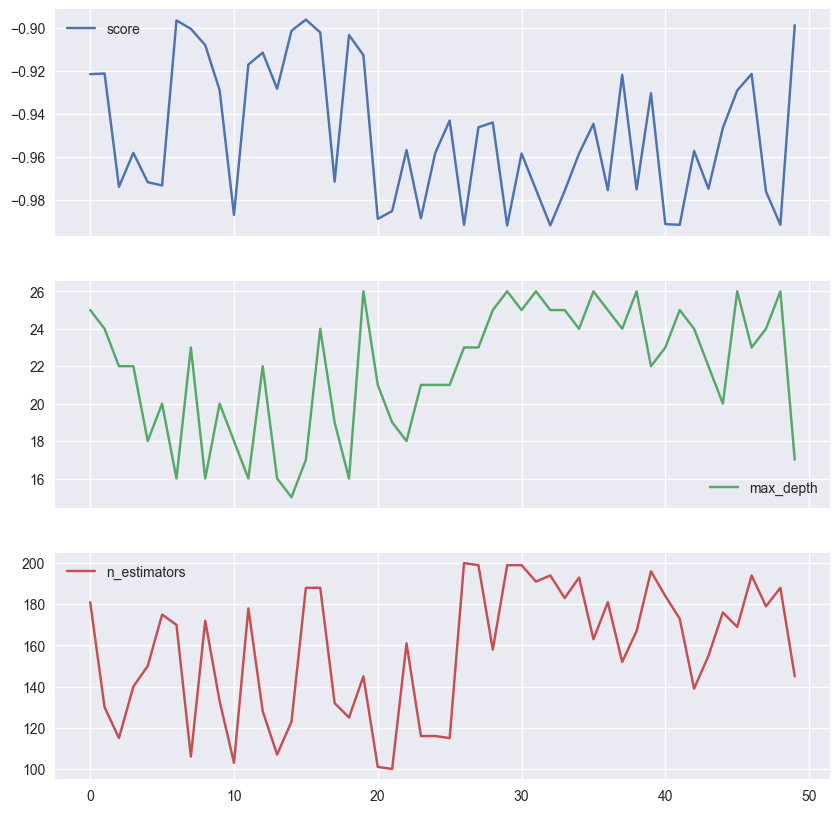

In [25]:
# отрисуем, как менялась точность при различных гиперпараметрах
tpe_results=np.array([[x['result']['loss'],
                      x['misc']['vals']['max_depth'][0],
                      x['misc']['vals']['n_estimators'][0]] for x in trials.trials])

tpe_results_df=pd.DataFrame(tpe_results,
                           columns=['score', 'max_depth', 'n_estimators'])
# тепловая карта в данном случае не очень наглядна, возьмем линейный график
tpe_results_df.plot(subplots=True,figsize=(10, 10));

#### Метрика опять же не улучшилась

## <center> Optuna

##### Логистическая регрессия

In [13]:
def optuna_lr(trial):
  # задаем пространства поиска гиперпараметров
  penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
  solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
  C = trial.suggest_float('C', 0.1, 1, step=0.1)

  # создаем модель
  model = linear_model.LogisticRegression(penalty=penalty,
                                          solver=solver,
                                           C= C,
                                          random_state=random_state)
  # обучаем модель
  model.fit(X_train, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train))

  return score
 

In [14]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="linear_model.LogisticRegression", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_lr, n_trials=20)

[I 2023-03-31 09:47:16,208] A new study created in memory with name: linear_model.LogisticRegression
[I 2023-03-31 09:47:18,323] Trial 0 finished with value: 0.8755676657584014 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 0.30000000000000004}. Best is trial 0 with value: 0.8755676657584014.
[I 2023-03-31 09:47:19,456] Trial 1 finished with value: 0.8381520119225037 and parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.30000000000000004}. Best is trial 0 with value: 0.8755676657584014.
[I 2023-03-31 09:47:22,673] Trial 2 finished with value: 0.8935395814376705 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 1.0}. Best is trial 2 with value: 0.8935395814376705.
[I 2023-03-31 09:47:24,994] Trial 3 finished with value: 0.8839745531657073 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 0.5}. Best is trial 2 with value: 0.8935395814376705.
[I 2023-03-31 09:47:29,239] Trial 4 finished with value: 0.8762886597938144 and parameters: {'penal

CPU times: total: 1min 34s
Wall time: 2min 12s


In [15]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'penalty': 'l2', 'solver': 'liblinear', 'C': 1.0}
f1_score на обучающем наборе: 0.89


In [16]:
# рассчитаем точность для тестовой выборки
model = linear_model.LogisticRegression(**study.best_params,random_state=random_state, )
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.80


In [17]:
%%time
# можем прододжить подбор, указав n_trials(любое число, которое добавится к предыдущим итерациям) 
study.optimize(optuna_lr, n_trials=20)

[I 2023-03-31 09:49:32,728] Trial 20 finished with value: 0.8858530661809351 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 0.6}. Best is trial 2 with value: 0.8935395814376705.
[I 2023-03-31 09:49:34,470] Trial 21 finished with value: 0.8935395814376705 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 1.0}. Best is trial 2 with value: 0.8935395814376705.
[I 2023-03-31 09:49:36,089] Trial 22 finished with value: 0.8935395814376705 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 1.0}. Best is trial 2 with value: 0.8935395814376705.
[I 2023-03-31 09:49:37,699] Trial 23 finished with value: 0.8920557913887204 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 0.9}. Best is trial 2 with value: 0.8935395814376705.
[I 2023-03-31 09:49:39,315] Trial 24 finished with value: 0.8935395814376705 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 1.0}. Best is trial 2 with value: 0.8935395814376705.
[I 2023-03-31 09:49:41,101] Trial 2

CPU times: total: 54.2 s
Wall time: 1min 17s


In [18]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'penalty': 'l2', 'solver': 'liblinear', 'C': 1.0}
f1_score на обучающем наборе: 0.89


In [19]:
# рассчитаем точность для тестовой выборки
model = linear_model.LogisticRegression(**study.best_params,random_state=random_state, )
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.80


In [20]:
optuna.visualization.plot_optimization_history(study, target_name="f1_score")

In [21]:
optuna.visualization.plot_param_importances(study, target_name="f1_score")

##### Случайный лес


In [22]:
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=random_state)
  # обучаем модель
  model.fit(X_train, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train))

  return score
  

In [23]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2023-03-31 10:04:16,331] A new study created in memory with name: RandomForestClassifier
[I 2023-03-31 10:04:24,528] Trial 0 finished with value: 0.9570514773073409 and parameters: {'n_estimators': 136, 'max_depth': 20, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.9570514773073409.
[I 2023-03-31 10:04:35,091] Trial 1 finished with value: 0.9155963302752295 and parameters: {'n_estimators': 157, 'max_depth': 12, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.9570514773073409.
[I 2023-03-31 10:04:47,921] Trial 2 finished with value: 0.990791896869245 and parameters: {'n_estimators': 144, 'max_depth': 22, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.990791896869245.
[I 2023-03-31 10:04:56,370] Trial 3 finished with value: 0.9339449541284404 and parameters: {'n_estimators': 154, 'max_depth': 12, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.990791896869245.
[I 2023-03-31 10:05:04,258] Trial 4 finished with value: 0.9193993257738278 and parameters: {'n_est

CPU times: total: 1min 54s
Wall time: 3min 10s


In [25]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 107, 'max_depth': 30, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.99


In [26]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=random_state, )
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.80


In [27]:
%%time
# можем прододжить подбор, указав n_trials(любое число, которое добавится к предыдущим итерациям) 
study.optimize(optuna_rf, n_trials=20)

[I 2023-03-31 10:17:54,021] Trial 20 finished with value: 0.9417860408412069 and parameters: {'n_estimators': 126, 'max_depth': 28, 'min_samples_leaf': 5}. Best is trial 10 with value: 0.9911070223857713.
[I 2023-03-31 10:18:01,747] Trial 21 finished with value: 0.9898866074164879 and parameters: {'n_estimators': 102, 'max_depth': 30, 'min_samples_leaf': 2}. Best is trial 10 with value: 0.9911070223857713.
[I 2023-03-31 10:18:07,788] Trial 22 finished with value: 0.9722306988098871 and parameters: {'n_estimators': 109, 'max_depth': 27, 'min_samples_leaf': 3}. Best is trial 10 with value: 0.9911070223857713.
[I 2023-03-31 10:18:15,116] Trial 23 finished with value: 0.9895833333333333 and parameters: {'n_estimators': 117, 'max_depth': 30, 'min_samples_leaf': 2}. Best is trial 10 with value: 0.9911070223857713.
[I 2023-03-31 10:18:22,105] Trial 24 finished with value: 0.9715857011915675 and parameters: {'n_estimators': 130, 'max_depth': 18, 'min_samples_leaf': 3}. Best is trial 10 with va

CPU times: total: 1min 57s
Wall time: 2min 29s


In [28]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 107, 'max_depth': 30, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.99


In [29]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=random_state, )
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.80


In [30]:
optuna.visualization.plot_optimization_history(study, target_name="f1_score")

In [31]:
optuna.visualization.plot_param_importances(study, target_name="f1_score")